In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


%matplotlib notebook

import sys
sys.path.append('../')

In [2]:
from Scripts.DataManager import IO
import Scripts.AnalysisTools as AT
import Scripts.DataManager as DM

In [3]:
io = IO('../Data/EXP171031/DRS4_long/40bar/')

In [114]:
measurements = io.search(output=False, kind = '')

sig_times  = DM.extract(measurements , list_of_ids=['measure', 'FaradayCup','sig_time'])
sig_uvolts = DM.extract(measurements , list_of_ids=['measure', 'FaradayCup','sig_uvolt'])

<IPython.core.display.Javascript object>


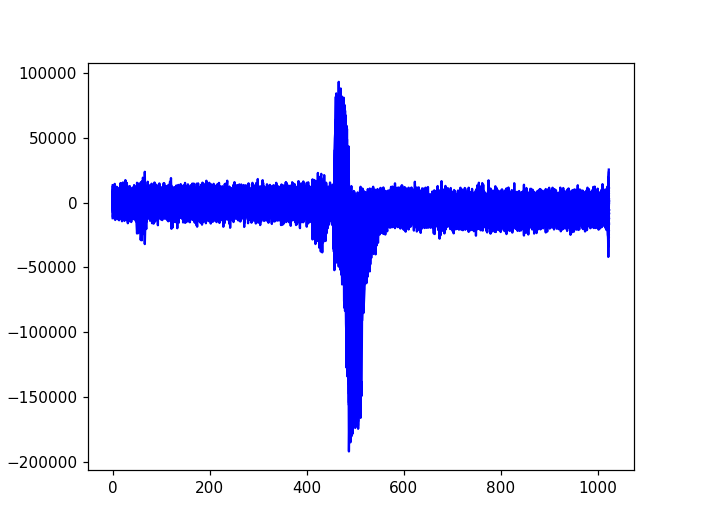

In [5]:
plt.figure('all signals')
for sig_time, sig_uvolt in zip(sig_times, sig_uvolts):
    plt.plot(sig_time, sig_uvolt, 'b')

In [7]:
import peakutils
sig_time = sig_times[100]
sig_uvolt = sig_uvolts[100][sig_time > 400]
sig_time = sig_time[sig_time > 400]

print (len(sig_time),len(sig_uvolt))

624 624


<IPython.core.display.Javascript object>


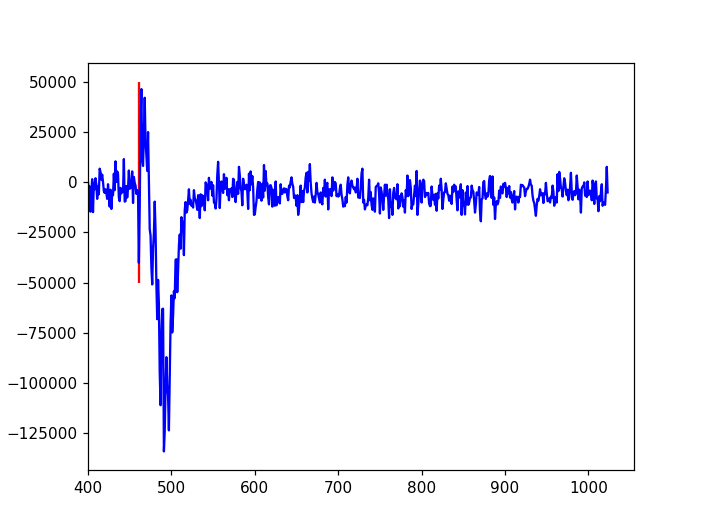

0.494900928231


In [65]:
plt.figure('example signal')
plt.plot(sig_time, sig_uvolt, 'b')

mi = min(sig_uvolt)
ma = max(sig_uvolt)
print (- (2e4 + ma)/mi)

ind1 = peakutils.indexes(-sig_uvolt, thres= (2e4 + ma)/(ma - mi) , min_dist=1)[0]
plt.vlines(sig_time[ind1], -5e4, 5e4, color = 'r')
plt.xlim(400, None)

first_min = sig_uvolt[ind1]

time1 = sig_time[ind1]

<IPython.core.display.Javascript object>


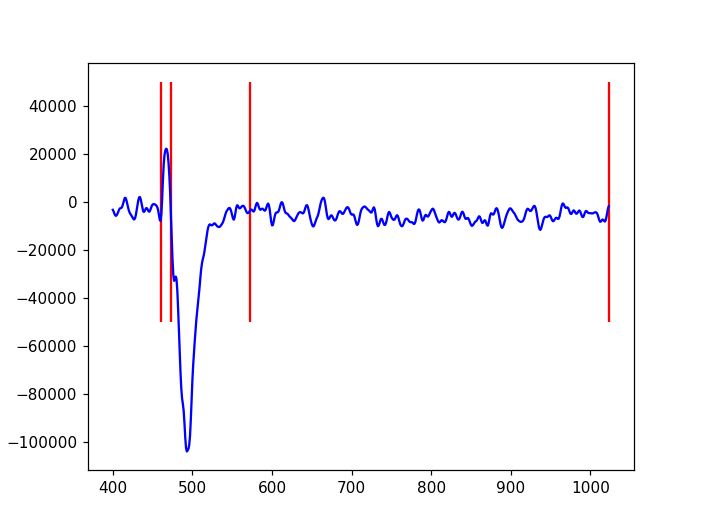

In [100]:
from scipy.ndimage.filters import gaussian_filter

sig_uvoltgauss = gaussian_filter(sig_uvolt, 2)

from scipy.interpolate import UnivariateSpline

us = UnivariateSpline(sig_time, sig_uvoltgauss)

plt.figure('gaussian signal')
plt.plot(sig_time, sig_uvoltgauss, 'b')

#plt.plot(sig_time[2:], np.diff(np.diff(sig_uvoltgauss)), 'b')

roots = us.roots()

time2 = roots[roots > sig_time[ind1]][1]
time3 = time2 + 100
time4 = sig_time[-1]
plt.vlines([time1, time2, time3, time4], -5e4, 5e4, color = 'r')

205929.6
-2853994.56
-2523394.56


In [94]:
def extract_information(sig_time, sig_uvolt):
    
    sig_uvolt = sig_uvolt[sig_time > 400]
    sig_time = sig_time[sig_time > 400]
    
    mi = min(sig_uvolt)
    ma = max(sig_uvolt)

    inds = peakutils.indexes(-sig_uvolt, thres= (2e4 + ma)/(ma - mi) , min_dist=1)
    if len(inds) == 0:
        return None, None, None, None
    ind1 = inds[0]
    plt.vlines(sig_time[ind1], -5e4, 5e4, color = 'r')
    plt.xlim(400, None)

    first_min = sig_uvolt[ind1]

    time1 = sig_time[ind1]
    
    
    from scipy.ndimage.filters import gaussian_filter

    sig_uvoltgauss = gaussian_filter(sig_uvolt, 2)

    from scipy.interpolate import UnivariateSpline

    us = UnivariateSpline(sig_time, sig_uvoltgauss)

    roots = us.roots()
    if len(roots[roots > time1]) < 2:
        return None, None, None, None
    time2 = roots[roots > time1][1]
    time3 = time2 + 100
    time4 = sig_time[-1]
    
    
    def integrate(timea, timeb):
        return np.trapz(sig_uvolt[np.logical_and(sig_time > timea, sig_time < timeb)], x = sig_time[np.logical_and(sig_time > timea, sig_time < timeb)])

    int1 = integrate(time1, time2)
    int2 = integrate(time2, time3)
    int3 = integrate(time3, time4)
    return first_min, int1, int2, int3

In [95]:
infos = [extract_information(sig_time,sig_uvolt) for sig_time,sig_uvolt in zip(sig_times,sig_uvolts)] 

[ 455.18937866  464.25957944  479.42268668  489.38878869  526.38866994
  527.0328392   549.25293822  550.27072352  561.52794239  570.97171824
  582.30994123  601.1075672   611.84659164  616.00287955  621.91313421
  626.31793048  628.57545234  636.44448891  641.18822848  647.75691538
  650.92221109  660.41150659  666.3429523   674.97284895  701.1594317
  704.23209542  733.78960355  742.58293041  753.51461148  756.46855696
  783.39029407  785.43156673  798.04939579  800.49688484  803.49829976
  807.79993258  824.93446502  828.53870271  849.8732329   858.05935849
  888.59853604  889.29091373  896.262717    902.39257154  931.22582773
  931.76869882  935.47378751  941.19424779  955.44455477  958.90339855
  990.37536623  996.32715723]
[  429.49965962   443.06901288   447.83216004   452.95838172   466.54801708
   470.266871     488.36417201   489.15916009   504.37534011   534.75614643
   551.93444183   553.26143744   592.8270507    596.61328976   598.6160446
   607.50481044   610.86804403   6

[ 521.27049552  534.24660161  544.25749429  564.61746263  568.96757736
  590.08599001  602.64597482  622.80559049  632.1363929   643.68813109
  650.40840396  655.41131182  669.21992618  678.18976666  680.50599844
  685.42333024  687.8382099   693.3108998   695.3921596   710.55210409
  712.75446158  720.70779021  736.60754126  739.15049816  753.28512417
  765.09508589  774.21140792  803.20108396  807.45256797  823.15230454
  825.47601922  837.68741783  842.40615718  858.51651201  860.93631282
  875.48999437  887.52714503  897.82419607  912.7956138   915.85989858
  921.58463893  924.65363592  934.83635761  937.66034598  975.11891654
  981.85280861  987.63573131  995.62636795]
[  516.29475045   521.4508978    532.7013883    538.25828133   543.26770147
   550.69106782   566.19936235   571.20626846   587.23130135   608.25606171
   610.63154605   634.76080495   635.99354104   652.23913931   660.55133786
   669.64083962   683.51604052   703.48032322   710.59679333   712.05994375
   718.143002

[ 477.16229676]
[ 461.077923    473.1399723   564.62593956  566.89765794  581.28094642
  584.8914074   641.26041243  642.12276333  933.16146944  934.95510274]
[ 443.9458138   453.04876953  462.11386195  464.70872256  470.74198021
  482.76465566  625.47625402  630.07586499  962.09241353  963.93402795]
[ 472.25944835]
[ 457.4048237   469.00114148  581.34797931  584.93669672  642.35872377
  645.7320736   658.34670823  662.13126504]
[ 442.48081881  451.14311016  470.61731604  482.87481124]
[ 477.6089389]
[ 437.2939048   444.7613498   458.94722077  470.1398917   552.19450483
  557.66664435  583.66750977  592.519733    606.2834013   610.0874761
  613.34378006  614.25797869  632.15399868  636.13576314  686.9972287
  688.9943678   924.98685119  927.26525625]
[ 460.12471672  470.49322156  561.05395793  562.82909655  660.01927439
  662.58892177  685.67486289  691.98794315  837.34527888  838.41768136]
[ 455.77800461  467.99488532  592.87965416  593.91820394  960.38289074
  964.90398934]
[ 474.135

<IPython.core.display.Javascript object>


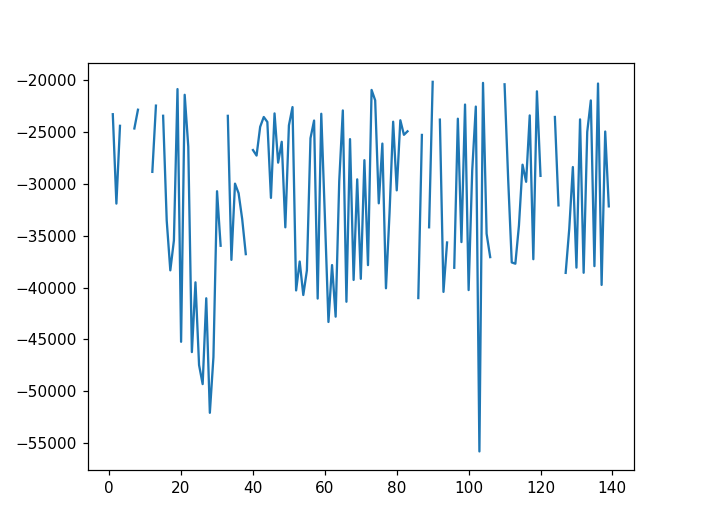

In [99]:
infos = np.array(infos)

plt.figure('test')
plt.plot(infos[:,0])

In [122]:
def find_first_neg_peak(sig_time,sig_uvolt):
    sig_uvolt = sig_uvolt[sig_time > 400]
    sig_time = sig_time[sig_time > 400]
    
    mi = min(sig_uvolt)
    ma = max(sig_uvolt)

    inds = peakutils.indexes(-sig_uvolt, thres= (2e4 + ma)/(ma - mi) , min_dist=1)
    
    if len(inds) == 0:
        print ('No peak')
        return None
    
    ind1 = inds[0]
    
    from scipy.ndimage.filters import gaussian_filter
    sig_uvoltgauss = gaussian_filter(sig_uvolt, 4)
    
    mi = min(sig_uvoltgauss)
    ma = max(sig_uvoltgauss)

    inds = peakutils.indexes(-sig_uvoltgauss, thres= (2e4 + ma)/(ma - mi) , min_dist=1)    
    
    plt.vlines([ind1],1e4, -1e4)
    
    if len(inds) and inds[0] < ind1 + 5:
        return None
    print (ind1)
    
    return sig_uvolt[ind1]

<IPython.core.display.Javascript object>


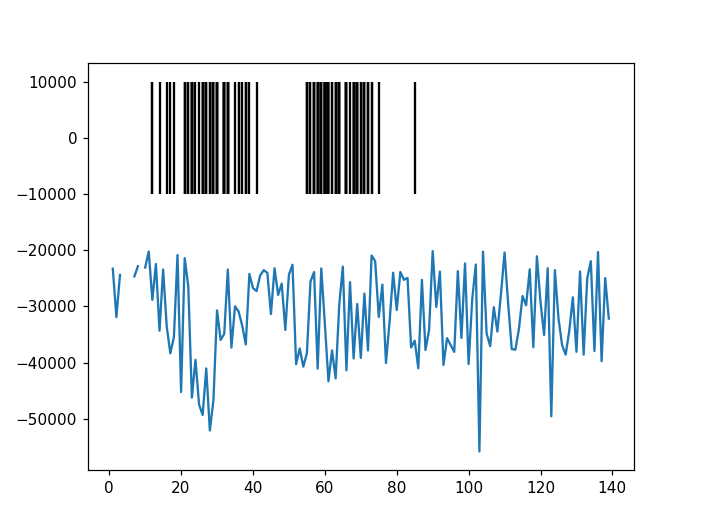

No peak
32
18
26
No peak
32
No peak
29
28
No peak
26
60
64
29
58
33
59
60
66
38
58
27
25
62
66
57
66
68
57
72
29
69
70
36
71
68
33
66
59
61
55
23
33
41
26
32
61
60
30
55
38
21
71
70
64
32
58
23
62
30
66
68
56
59
36
23
71
30
68
22
61
17
72
35
16
71
37
69
60
27
68
33
14
22
60
64
61
33
60
56
30
64
29
59
55
61
63
32
60
12
61
69
23
73
38
26
57
63
64
69
23
39
57
29
68
21
28
75
60
21
67
63
26
85
63
58
58
69
60
12
72
24
60
27
30
58
32
73
23
61


In [127]:
plt.figure('first peak height')
plt.plot([find_first_neg_peak(sig_time,sig_uvolt) for sig_time,sig_uvolt in zip(sig_times,sig_uvolts)] )

In [130]:
measurements = io.search(output=False, kind = 'scan*/[*')

sig_times  = DM.extract(measurements , list_of_ids=['measure', 'FaradayCup','sig_time'])
sig_uvolts = DM.extract(measurements , list_of_ids=['measure', 'FaradayCup','sig_uvolt'])

In [131]:
def get_integrals(sig_time, sig_uvolt):
    
    te = sig_time[-1]
    def integrate(timea, timeb):
        return np.trapz(sig_uvolt[np.logical_and(sig_time > timea, sig_time < timeb)], x = sig_time[np.logical_and(sig_time > timea, sig_time < timeb)])

    
    return integrate(450, 475), integrate(475, 600), integrate(600, te)

<IPython.core.display.Javascript object>


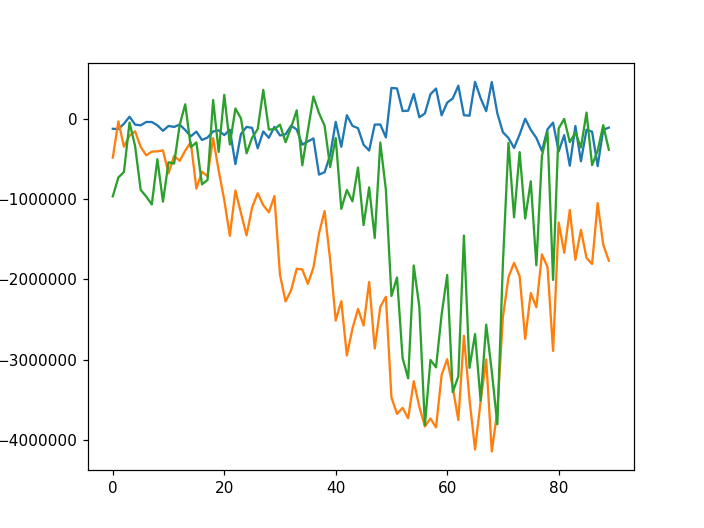

In [132]:
plt.figure('fixed bounds')
plt.plot([get_integrals(sig_time,sig_uvolt) for sig_time,sig_uvolt in zip(sig_times,sig_uvolts)] )